In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d1V = pd.read_csv("1.5/CH1.CSV")
d1I = pd.read_csv("1.5/CH2.CSV")

d2V = pd.read_csv("2/CH1.CSV")
d2I = pd.read_csv("2/CH2.CSV")

In [3]:
V1 = d1V["v"].values
I1 = d1I["v"].values

V2 = d2V["v"].values
I2 = d2I["v"].values

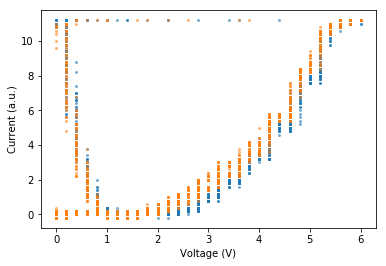

In [4]:
plt.plot(V1, I1, "o", ms = 2, alpha = 0.5)
plt.plot(V2, I2, "o", ms = 2, alpha = 0.5)

plt.xlabel("Voltage (V)")
plt.ylabel("Current (a.u.)")
plt.show()

In [5]:
data1 = np.vstack((d1V["t"].values, d1V["v"].values))
data1 = np.vstack((data1, d1I["v"].values)).T
df1 = pd.DataFrame(data = data1, columns=["t", "V", "I"])

In [6]:
data2 = np.vstack((d2V["t"].values, d2V["v"].values))
data2 = np.vstack((data2, d2I["v"].values)).T
df2 = pd.DataFrame(data = data2, columns=["t", "V", "I"])

In [7]:
d1 = df1.groupby("V").mean()
d2 = df2.groupby("V").mean()

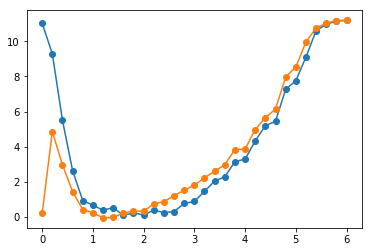

In [8]:
plt.plot(d1["I"], "-o")
plt.plot(d2["I"], "-o")
plt.show()